# Explortary Data Analysis Êé¢Á¥¢ÊÄßÊï∞ÊçÆÂàÜÊûê
0. Data Schema (Data Dictionary)
    - Present the dataset schema with column names, data types, and descriptions.
    - Helps readers quickly understand the business meaning of each variable.

1. Dataset Overview
    - Display dataset shape (rows √ó columns).
    - Show column names and data types.
    - Generate descriptive statistics (.describe()) for numerical and categorical variables separately.

2. Data Quality Checks
    - Missing values: count, percentage, and patterns (e.g., whether NA values are linked to business rules like tenure=0).
    - Duplicates: identify and handle duplicate records if any.
    - Data type corrections: ensure numeric fields are truly numeric (e.g., TotalCharges).

3. Data Preprocessing
    - Outlier detection & treatment (boxplots, IQR, z-score).
    - Irrelevant attributes: drop columns like customerID that do not contribute to modeling.
    - Feature adjustments: transform skewed variables, normalize if necessary.

4. Exploratory Data Visualization
    - Churn distribution (target variable).
    - Univariate plots (distribution of tenure, monthly charges, etc.).
    - Bivariate plots (Churn vs. categorical features, churn rate by contract type, etc.).
        - Churn rate by service/demographics
    - Correlation heatmap for numeric features.

5. Conclusion & Insights
    - Categorical encoding: One-hot encoding / Label encoding depending on the model.
    - Feature grouping: group payment methods, contract types, etc. if needed.
    - New features: e.g., AverageCharges = TotalCharges / tenure (for tenure > 0).
    - Export the preprocessed df and proceed to next step, model training.


In [2]:
# create virtual environment
# python -m venv venv
# source venv/bin/activate

# 0. Data Schema

| Column Name          | Data Type                                   | Description                                                                |
| -------------------- | ------------------------------------------- | -------------------------------------------------------------------------- |
| **customerID**       | string                                      | Unique customer identifier (anonymized ID).                                |
| **gender**           | category (Male/Female)                      | Customer‚Äôs gender.                                                         |
| **SeniorCitizen**    | integer (0/1)                               | Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).      |
| **Partner**          | category (Yes/No)                           | Whether the customer has a spouse or partner.                              |
| **Dependents**       | category (Yes/No)                           | Whether the customer has dependents (e.g., children, elderly relatives).   |
| **tenure**           | integer (0‚Äì72)                              | Number of months the customer has stayed with the company.                 |
| **PhoneService**     | category (Yes/No)                           | Indicates if the customer has phone service.                               |
| **MultipleLines**    | category (Yes/No/No phone service)          | Whether the customer has multiple phone lines.                             |
| **InternetService**  | category (DSL/Fiber optic/No)               | Type of internet service subscribed.                                       |
| **OnlineSecurity**   | category (Yes/No/No internet service)       | Subscription to online security services.                                  |
| **OnlineBackup**     | category (Yes/No/No internet service)       | Subscription to online backup services.                                    |
| **DeviceProtection** | category (Yes/No/No internet service)       | Subscription to device protection services.                                |
| **TechSupport**      | category (Yes/No/No internet service)       | Subscription to technical support services.                                |
| **StreamingTV**      | category (Yes/No/No internet service)       | Subscription to streaming TV services.                                     |
| **StreamingMovies**  | category (Yes/No/No internet service)       | Subscription to streaming movies services.                                 |
| **Contract**         | category (Month-to-month/One year/Two year) | Type of contract the customer holds.                                       |
| **PaperlessBilling** | category (Yes/No)                           | Indicates if the customer uses paperless billing.                          |
| **PaymentMethod**    | category                                    | Payment method (e.g., bank transfer, credit card, electronic check).       |
| **MonthlyCharges**   | float                                       | Amount charged to the customer monthly (USD).                              |
| **TotalCharges**     | float                                       | Total amount charged to the customer (USD).                                |
| **Churn**            | category (Yes/No)                           | Indicates whether the customer has churned (Yes = Churned, No = Retained). |


## The data set includes information about:
- Customers who left within the last month ‚Äì the column is called Churn
- Services that each customer has signed up for ‚Äì phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information - how long they‚Äôve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers ‚Äì gender, age range, and if they have partners and dependents

## Business Context:
- Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [3]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# 1. Dataset Overview
- Display dataset shape (rows √ó columns).
- Show column names and data types.
- Generate descriptive statistics (.describe()) for numerical and categorical variables separately.

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Note: We noticed that TotalCharges is a object type, we need to change the data type

In [6]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             3               3              3  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges Churn  
count           7043  7043  
unique          6531     2  
top             20.2    No  
freq              11  5174  
mean             NaN   NaN  
std              NaN   NaN  
min              NaN   NaN  
25%              NaN   NaN  
50%              NaN   NaN  
75%              NaN   NaN  
max              NaN   NaN  

[11 rows x 21 columns]

# 2. Data Quality Checks
- Missing values: count, percentage, and patterns (e.g., whether NA values are linked to business rules like tenure=0).
- Duplicates: identify and handle duplicate records if any.
- Data type corrections: ensure numeric fields are truly numeric (e.g., TotalCharges).

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Note: Appears to have no missing values, but we need to consider ' ' cases

In [9]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# print the rows where TotalCharges is NaN
df[df['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

### Note: 
How to deal with missing values?
1. Consider business context!!!
2. If few, we may drop them.
3. If there are several, we may need to impute them using other values like mean, median, mode or other model predictions.

In [12]:
# list all the rows with tunure = 0 
df[df['tenure'] == 0]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

### Note:
- In this case, it appears that all the rows with missing total charges have tenure = 0, which is the number of months the customer has stayed with the company
- Given that these customers have not stayed with the company for at least one month, there wouldn't be any monthly charge based on the business context.
- So we may use '0' to fill in those missing cells.


In [13]:
# Note: All rows with tenure = 0 have TotalCharges = 0, 
# which is consistent with the business logic that customers who have not stayed with the company 
# for at least one month would not incur any charges.
# df.fillna(df["TotalCharges"].mean())
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df[df['tenure'] == 0].filter(items=['customerID', 'tenure', 'TotalCharges'])

customerID  tenure  TotalCharges
488   4472-LVYGI       0           0.0
753   3115-CZMZD       0           0.0
936   5709-LVOEQ       0           0.0
1082  4367-NUYAO       0           0.0
1340  1371-DWPAZ       0           0.0
3331  7644-OMVMY       0           0.0
3826  3213-VVOLG       0           0.0
4380  2520-SGTTA       0           0.0
5218  2923-ARZLG       0           0.0
6670  4075-WKNIU       0           0.0
6754  2775-SEFEE       0           0.0

# 3. Data Preprocessing: 
- Outlier detection & treatment (boxplots, IQR, z-score).
- Irrelevant attributes: drop columns like customerID that do not contribute to modeling.
- Feature adjustments: transform skewed variables, normalize if necessary.

In [16]:
# Drop customerID column as it is not relevant for analysis
df = df.drop(columns=['customerID'])

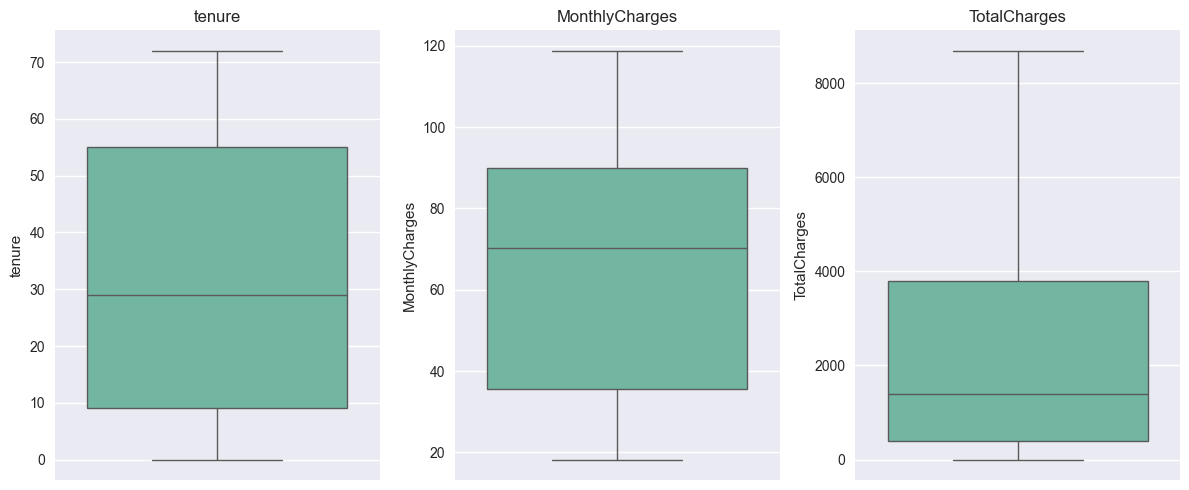

In [17]:
# Outliers we focused on numerical variables:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

### Note:
1. tenure (0‚Äì72, mean = 32.4, std = 24.6)
    - Min = 0 (new customers), Max = 72 (longest contract = 6 years).
    - Values are fully consistent with Telco business logic ‚Üí no abnormal outliers.

2. MonthlyCharges (18.25‚Äì118.75, mean = 64.8, std = 30.1)
    - Minimum close to the basic plan ($18.25), maximum close to premium plan ($118.75).
    - Range between $20‚Äì120 is reasonable ‚Üí high charges reflect premium customers, not outliers.

3. TotalCharges (0‚Äì8684.8, mean = 2279.7, std = 2266.8)
    - Min = 0 corresponds to tenure = 0 (new customers).
    - Max ‚âà 8700, which matches 72 months √ó $120 ‚âà 8640.
    - Large variation is expected since TotalCharges ‚âà tenure √ó MonthlyCharges.

Conclusion: Extreme values are business-meaningful and therefore not treated as outliers.

### Validation: Test whether TotalCharges = tenure * MonthlyCharges

In [19]:
# Test whether TotalCharges = tenure * MonthlyCharges
df['TotalCharges_check'] = df['tenure'] * df['MonthlyCharges']
df['TotalCharges_check'] = df['TotalCharges_check'].round(2)
df['TotalCharges_check'] = df['TotalCharges_check'].astype(float)
df['TotalCharges_check'].equals(df['TotalCharges'])

False

In [20]:
# Check if there are any discrepancies
discrepancies = df[df['TotalCharges_check'] != df['TotalCharges']]
discrepancies[['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_check']]

tenure  MonthlyCharges  TotalCharges  TotalCharges_check
1         34           56.95       1889.50              1936.3
2          2           53.85        108.15               107.7
3         45           42.30       1840.75              1903.5
4          2           70.70        151.65               141.4
5          8           99.65        820.50               797.2
...      ...             ...           ...                 ...
7038      24           84.80       1990.50              2035.2
7039      72          103.20       7362.90              7430.4
7040      11           29.60        346.45               325.6
7041       4           74.40        306.60               297.6
7042      66          105.65       6844.50              6972.9

[6418 rows x 4 columns]

### Note: TotalCharges Âπ∂‰∏çÊòØ‰∏•Ê†ºÁ≠â‰∫é tenure √ó MonthlyChargesÔºåÂõ†‰∏∫ÂÆ¢Êà∑Âú®‰∏çÂêåÊúà‰ªΩÂèØËÉΩÂèòÊõ¥‰∫ÜÂ•óÈ§ê/ÊúçÂä°ÔºåÁ¥ØËÆ°Ë¥¶ÂçïÂõ†Ê≠§‰∏çÂêå

# 4. Explortary Data Visualization
- Univariate Analysis
- Bivariate Analysis
- Correlation Heatmap

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalCharges_check'],
      dtype='object')

## 4.1 Univariate Analysis: Target (Churn distribution)
- ÂçïÂèòÈáèÂàÜÊûê: ÁõÆÊ†áÂèòÈáè (ÊµÅÂ§±ÂàÜÂ∏É)
- ‰∏ªË¶ÅÁõÆÁöÑÔºöÁúãÁ±ªÂà´ÂàÜÂ∏ÉÔºåÊòØÂê¶Â≠òÂú® class imbalance
- Telco Êï∞ÊçÆÈáå‰∏ÄËà¨ÊòØ No ‚âà 73%ÔºåYes ‚âà 27% ‚Üí ‰∏≠Â∫¶‰∏çÂπ≥Ë°°

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/799716544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


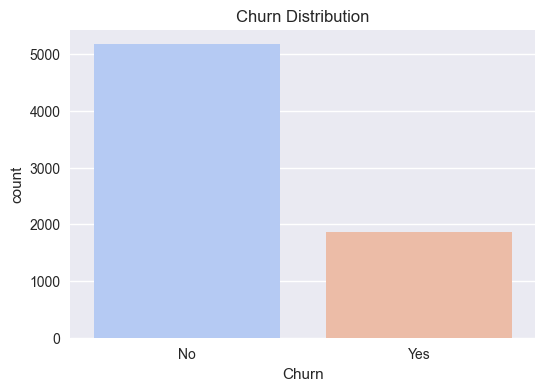

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [22]:
# Target Variable: Churn distribution
# Decide whether we need to do resampling 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Churn Distribution')
plt.show()

# percentage
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

### Note:
- We might need to perform resampling later due to class imbalance

## 4.2 Univariate Analysis: Numeric features
- ÂçïÂèòÈáèÂàÜÊûê: Êï∞ÂÄºÁâπÂæÅ (tenure, MonthlyCharges, TotalCharges)
- ‰∏ªË¶ÅÁõÆÁöÑÔºöÁúãÊï∞ÂÄºÁâπÂæÅÁöÑÂàÜÂ∏ÉÂΩ¢ÊÄÅ
- Êàë‰ª¨ÈáçÁÇπÂÖ≥Ê≥®ÁöÑÂ±ûÊÄßÔºö
    - ÂºÇÂ∏∏ÂÄº
        - ÁÆ±Á∫øÂõæÈáåÊòØÂê¶ÊúâÊûÅÁ´Ø outliersÔºü
        - Â¶ÇÊûúÊúâÔºåÊ†ëÊ®°ÂûãÔºàXGB/LGBMÔºâÊ≤°ÂÖ≥Á≥ªÔºõ‰ΩÜÁ∫øÊÄßÊ®°ÂûãÂèØËÉΩÈúÄË¶Å winsorize / robust scaler
    - ÂÅèÂ∫¶ÔºàskewnessÔºâ
        - Â¶ÇÊûúÂàÜÂ∏É‰∏•ÈáçÂè≥ÂÅèÔºàÂ¶Ç TotalChargesÔºâÔºåLogistic Regression ÂèØ‰ª•ËÄÉËôë log ÂèòÊç¢ÔºåÂ¢ûÂº∫Á∫øÊÄßÂèØÂàÜÊÄß
        - log ÂèòÊç¢ÁöÑ‰ΩúÁî®Ôºö
            - ÈÄöËøáÂéãÁº©Â§ßÂÄºÔºåÊääÂàÜÂ∏É‚ÄúÊãâËøëÊ≠£ÊÄÅÔºàGaussian-likeÔºâ‚ÄùÔºåËÆ©ÁâπÂæÅÂíåÁõÆÊ†áÁöÑÂÖ≥Á≥ªÊõ¥Êé•ËøëÁ∫øÊÄß
            - ‰æãÂ¶ÇÔºöÊî∂ÂÖ•ÔºàIncomeÔºâ„ÄÅÊÄªË¥¶ÂçïÔºàTotalChargesÔºâ„ÄÅÈîÄÈáèËøôÁ±ªÂ§©ÁÑ∂Âè≥ÂÅèÁöÑÊï∞ÊçÆÔºålog ÂêéÈÄöÂ∏∏Êõ¥Êé•ËøëÊ≠£ÊÄÅ
            - ËøôÊ†∑ Logistic Regression Â≠¶Âà∞ÁöÑËæπÁïå‰ºöÊõ¥ÂêàÁêÜÔºå‰∏ç‰ºöË¢´ÊûÅÁ´ØÂÄºÂ∑¶Âè≥
    - Â≥∞Â∫¶ÔºàkurtosisÔºâ
        - È´òÂ≥∞Â∫¶ ‚Üí ÂàÜÂ∏ÉÈõÜ‰∏≠ÔºåÈïøÂ∞æÊõ¥ÊûÅÁ´ØÔºõÂèØËÉΩÂΩ±ÂìçÊ®°ÂûãÈ≤ÅÊ£íÊÄß
    - Â§öÂ≥∞
        - MonthlyCharges ÊòéÊòæÊòØÂ§öÂ≥∞ÁöÑÔºà‰∏çÂêåÂ•óÈ§ê‰ª∑Ê†ºÂ∏¶Ôºâ
        - ÊèêÁ§∫Êàë‰ª¨ÂèØËÉΩË¶Å ÂàÜÁÆ±ÔºàbinningÔºâ Êù•Â¢ûÂº∫Ëß£ÈáäÊÄßÔºåÊØîÂ¶Ç‰ΩéÂ•óÈ§ê / ‰∏≠Â•óÈ§ê / È´òÂ•óÈ§ê (ÁâπÂæÅÂ∑•Á®ã)


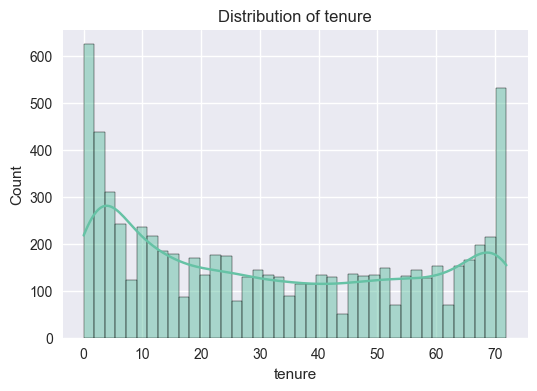

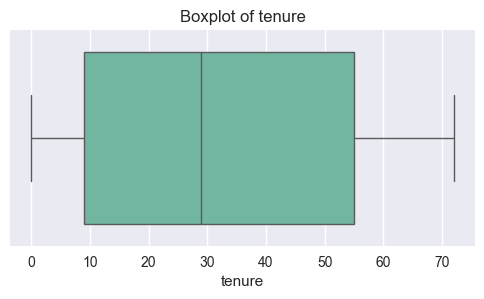

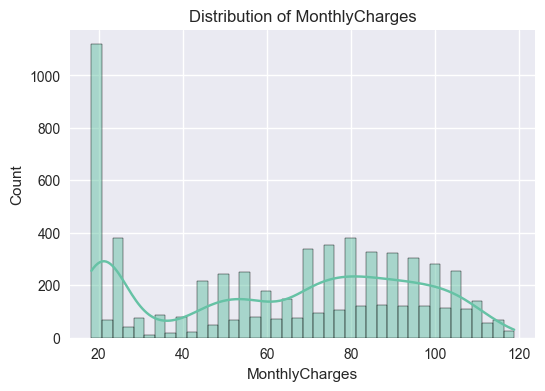

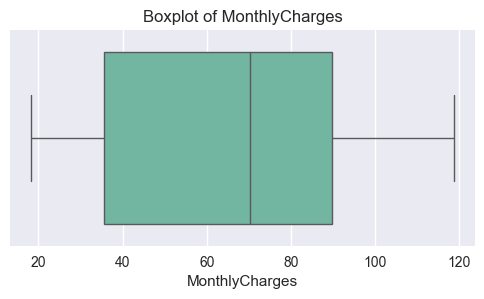

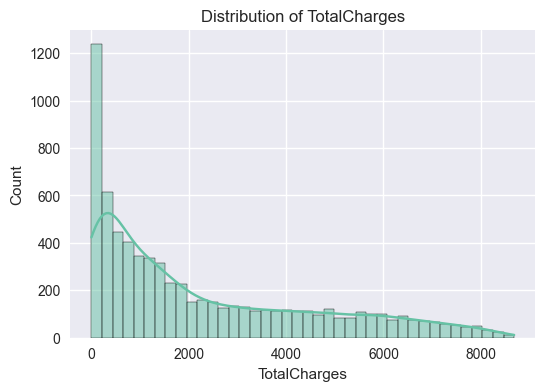

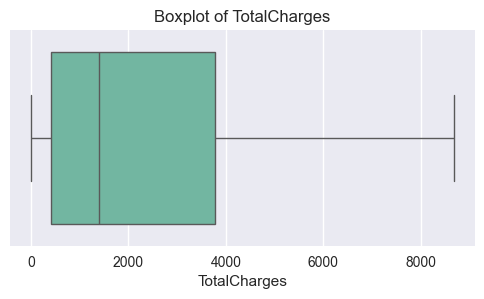

In [23]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, bins=40)
    plt.title(f'Distribution of {col}')
    plt.show()

    # ÁÆ±Á∫øÂõæÊ£ÄÊü•ÊûÅÁ´ØÂÄº
    fig, ax = plt.subplots(figsize=(6,2.8))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


### Business Insights:

### 1. TenureÔºàÂÆ¢Êà∑Âú®ÁΩëÊúàÊï∞Ôºâ

* ÂàÜÂ∏ÉÂëàÁé∞ **ÂèåÂ≥∞**Ôºö

  * **Êñ∞ÂÆ¢Êà∑Ôºà0‚Äì1 ÊúàÔºâ** Âç†ÊØîÈùûÂ∏∏Â§ßÔºåËØ¥ÊòéÂÖ¨Âè∏ÊúâÂ§ßÈáèÂàöÂä†ÂÖ•ÁöÑÂÆ¢Êà∑„ÄÇ
  * **ÈïøÊúüÂÆ¢Êà∑Ôºà70+ ÊúàÔºâ** ‰πüÂá∫Áé∞‰∏Ä‰∏™È´òÂ≥∞ÔºåËØ¥ÊòéÊúâÂø†ËØöÁî®Êà∑Áæ§‰Ωì„ÄÇ
  * **‰∏≠Èó¥Ôºà10‚Äì60 ÊúàÔºâ** ÂàÜÂ∏ÉÁõ∏ÂØπÂπ≥Áºì„ÄÇ
* **‰∏öÂä°ÂêØÁ§∫**Ôºö

  * Êñ∞ÂÆ¢Êà∑ churn È£éÈô©È´ò ‚Üí onboarding Âíå early engagement Ëá≥ÂÖ≥ÈáçË¶Å„ÄÇ
  * ÈïøÊúüÂÆ¢Êà∑ churn È£éÈô©‰ΩéÔºåËøÅÁßªÊàêÊú¨È´ò ‚Üí ÂèØ‰ª•ÊåñÊéò‰∫§ÂèâÈîÄÂîÆÂíåÂ¢ûÂÄºÊúçÂä°„ÄÇ

### 2. MonthlyChargesÔºàÊúàÂ∫¶Ë¥¶ÂçïÔºâ

* ÂàÜÂ∏ÉÂëàÁé∞ **Â§öÂ≥∞**Ôºö

  * \~20 ÁæéÂÖÉÊúâ‰∏Ä‰∏™Â§ßÂ≥∞ÔºàÂü∫Á°ÄÂ•óÈ§êÔºâ„ÄÇ
  * 60‚Äì90 ÁæéÂÖÉÂå∫Èó¥Áî®Êà∑ËæÉÂ§öÔºà‰∏≠Á´ØÂ•óÈ§êÔºâ„ÄÇ
  * 100+ ÁæéÂÖÉÁî®Êà∑Êï∞ÈáèÁõ∏ÂØπÂ∞ëÔºå‰ΩÜ‰ªçÊúâ‰∏ÄÂÆöÈõÜ‰∏≠ÔºàÈ´òÁ´ØÂ•óÈ§êÔºâ„ÄÇ
* **‰∏öÂä°ÂêØÁ§∫**Ôºö

  * Â§öÂ≥∞ÁªìÊûÑÂèçÊò†‰∫ÜÂ•óÈ§êÂàÜÂ±Ç„ÄÇ
  * È´òÊúàË¥πÂÆ¢Êà∑Ë¥°ÁåÆÊî∂ÂÖ•È´òÔºå‰ΩÜ churn ÂèØËÉΩÊõ¥ÊïèÊÑüÔºàÊÄß‰ª∑ÊØîÈóÆÈ¢òÔºâ„ÄÇ
  * ‰ΩéÊúàË¥πÂÆ¢Êà∑ churn È£éÈô©‰ΩéÔºå‰ΩÜ‰ª∑ÂÄºÊúâÈôê„ÄÇ

### 3. TotalChargesÔºàÁ¥ØËÆ°Ë¥¶ÂçïÔºâ

* ÂàÜÂ∏ÉÂëàÁé∞ **Âè≥ÂÅèÈïøÂ∞æ**Ôºö

  * Â§ßÈáèÁî®Êà∑ÁöÑ TotalCharges ËæÉ‰ΩéÔºàÊñ∞ÂÆ¢Êà∑Ôºâ„ÄÇ
  * Èöè tenure Â¢ûÂä†ÔºåTotalCharges Ëá™ÁÑ∂Á¥ØÁßØÔºåÊúÄÈ´òËÉΩÂà∞ 8000+„ÄÇ
* **‰∏öÂä°ÂêØÁ§∫**Ôºö

  * TotalCharges ÂÆûÈôÖ‰∏äÊòØ tenure √ó MonthlyCharges ÁöÑÂáΩÊï∞ ‚Üí È´òÂ∫¶ÂÖ±Á∫ø„ÄÇ
  * È´ò TotalCharges Áî®Êà∑ churn È£éÈô©‰ΩéÔºå‰ΩÜ‰∏ÄÊó¶ÊµÅÂ§±ÔºåÊçüÂ§±ÊûÅÂ§ß„ÄÇ
  * Êñ∞ÂÆ¢Êà∑ TotalCharges=0Ôºå churn È£éÈô©ÊúÄÈ´ò„ÄÇ

---

### Feature Engineering Insights

1. **Tenure ÂàÜÁÆ± & Êñ∞ÂÆ¢Êà∑ÁâπÂæÅ**

   * ‰∏çÂêåÂÆ¢Êà∑ÁîüÂëΩÂë®ÊúüÈò∂ÊÆµÁöÑ churn È£éÈô©Â∑ÆÂºÇÊòéÊòæÔºö

     * `0‚Äì12` = Êñ∞Áî®Êà∑ÔºàÂàöÁ≠æÁ∫¶ÔºåÊúÄÂÆπÊòì churnÔºâ
     * `13‚Äì36` = ‰∏≠ÊúüÁî®Êà∑ÔºàÂ∑≤Êúâ‰∏ÄÂÆöÁ≤òÊÄßÔºâ
     * `37+` = ËÄÅÁî®Êà∑ÔºàÂø†ËØöÂ∫¶Êõ¥È´òÔºâ
   * ÁâπÂæÅËÆæËÆ°Ôºö

     * `tenure_bin` = {Êñ∞„ÄÅ‰∏≠„ÄÅËÄÅ}
     * `is_new_customer = tenure <= 12`

2. **MonthlyCharges ÂàÜÁÆ±**

   * ‰∏çÂêå‰ª∑‰ΩçÂ•óÈ§êÁöÑ churn È£éÈô©Â∑ÆÂºÇÊòæËëóÔºåÈ´òË¥πÁéáÂÆ¢Êà∑ÂæÄÂæÄÊõ¥ÂÆπÊòì churn„ÄÇ
   * ÁâπÂæÅËÆæËÆ°Ôºö`monthly_bin` = {‰ΩéË¥πÁéá (0‚Äì40), ‰∏≠Á≠â (41‚Äì80), È´òË¥πÁéá (81+)}

3. **TotalCharges ËΩ¨Êç¢ ‚Üí AvgCharges**

   * `TotalCharges` ‰∏é `tenure` È´òÂ∫¶Áõ∏ÂÖ≥ÔºåÂèØËÉΩÂØºËá¥Â§öÈáçÂÖ±Á∫øÊÄß„ÄÇ
   * Êñ∞ÁâπÂæÅÔºö`AvgCharges = TotalCharges / tenure`ÔºàÂØπ tenure=0 ÁöÑÂÆ¢Êà∑ËÆæ‰∏∫ 0 Êàñ `MonthlyCharges`Ôºâ„ÄÇ
   * Ê≥®ÊÑèÔºö`TotalCharges` Âπ∂‰∏çÁ≠â‰∫é `tenure √ó MonthlyCharges`ÔºåÂõ†‰∏∫ÂÆ¢Êà∑ÂèØËÉΩÂú®‰∏çÂêåÊúà‰ªΩË∞ÉÊï¥ËøáÂ•óÈ§êÊàñÊúçÂä°ÔºåË¥¶ÂçïÂπ∂ÈùûÊÅíÂÆö„ÄÇ
   * ÈÄÇÁî®ÊÄßÔºö

     * **Ê†ëÊ®°ÂûãÔºàXGB/LGBMÔºâ**Ôºö`AvgCharges` ÂèØÈÄâÔºå‰∏ªË¶ÅÊèêÂçá‰∏öÂä°ÂèØËß£ÈáäÊÄß„ÄÇ
     * **Logistic Regression**ÔºöÂª∫ËÆÆÊûÑÈÄ† `AvgCharges`Ôºå‰ª•Èôç‰ΩéÂÖ±Á∫øÊÄßÔºåÂπ∂Êõ¥Â•ΩÂèçÊò†ÂÆ¢Êà∑ÁöÑ‚ÄúÂπ≥ÂùáÊúàÊ∂àË¥πÊ∞¥Âπ≥‚Äù„ÄÇ

## 4.3 Univariate Analysis: Categorical Features
- ÂçïÂèòÈáèÂàÜÊûê: Á±ªÂà´ÁâπÂæÅÔºàContract, InternetService, PaymentMethod, Gender, Partner, Dependents‚Ä¶Ôºâ
- ‰∏ÄËà¨‰∏çÂçïÁã¨ÂÅö UnivariateÔºåÂè™ÈúÄÂú® BivariateÔºàChurn vs Á±ªÂà´Ôºâ‰∏≠ÂàÜÊûê„ÄÇ
- ‰æãÂ§ñÊÉÖÂÜµÔºöÂ¶ÇÊûúÊüê‰∏™Á±ªÂà´ÁâπÂà´Á®ÄÂ∞ëÔºàÊûÅÂ∫¶‰∏çÂùáË°°ÔºâÔºåUnivariate ÂàÜÂ∏ÉÂõæÂèØ‰ª•ÊèêÁ§∫ÊòØÂê¶Ë¶ÅÂêàÂπ∂Êàñ drop„ÄÇ

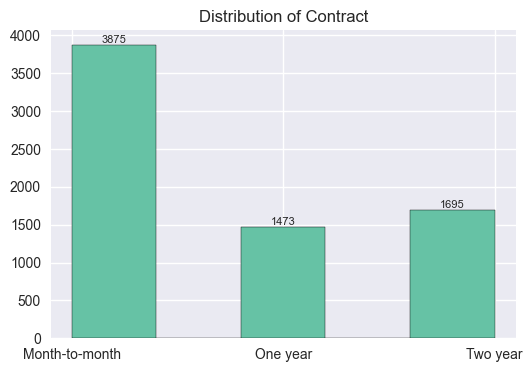

In [24]:
# ÁîªÁõ¥ÊñπÂõæ
fig, ax = plt.subplots(figsize=(6,4))
# ÁªòÂà∂Áõ¥ÊñπÂõæ
counts, bins, patches = ax.hist(df['Contract'], bins=5, edgecolor='black')

# Âú®ÊØè‰∏™Êü±Â≠ê‰∏äÊ†áÊï∞Â≠ó
for rect, count in zip(patches, counts):
    height = rect.get_height()
    if height > 0:  # Âè™Ê†áÈùûÈõ∂ÁöÑ
        ax.text(rect.get_x() + rect.get_width()/2, height,
                int(height), ha='center', va='bottom', fontsize=8)

ax.set_title('Distribution of Contract')
plt.show()

## 4.4 Bivariate Analysis: Churn Rate by Different Channels/Types of Services
- ÂèåÂèòÈáèÂàÜÊûê: Êää‰∫∫Áæ§ÊåâÁÖßÊ∏†ÈÅì/ÊúçÂä°Á±ªÂûãÂàÜÔºåÊù•ÁúãchurnÊµÅÂ§±Áéá
- InternetService, PaymentMethod, Contract

In [25]:
# ËÆ°ÁÆó‰∏çÂêåchannel‰∏ãÁöÑchurnÁéá
def churn_rate_by_group(df, group_col):
    churn_rate = (
        df.groupby(group_col)['Churn']
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()
    )
    churn_rate = churn_rate[churn_rate['Churn'] == "Yes"].drop(columns="Churn")
    return churn_rate.sort_values("percentage", ascending=False)

# InternetService
print("Churn Rate by Internet Service")
display(churn_rate_by_group(df, 'InternetService'))

# PaymentMethod
print("Churn Rate by Payment Method")
display(churn_rate_by_group(df, 'PaymentMethod'))

# Contract
print("Churn Rate by Contract")
display(churn_rate_by_group(df, 'Contract'))


Churn Rate by Internet Service


InternetService  percentage
3     Fiber optic   41.892765
1             DSL   18.959108
5              No    7.404980

Churn Rate by Payment Method


PaymentMethod  percentage
5           Electronic check   45.285412
7               Mailed check   19.106700
1  Bank transfer (automatic)   16.709845
3    Credit card (automatic)   15.243101

Churn Rate by Contract


Contract  percentage
1  Month-to-month   42.709677
3        One year   11.269518
5        Two year    2.831858

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/635234211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


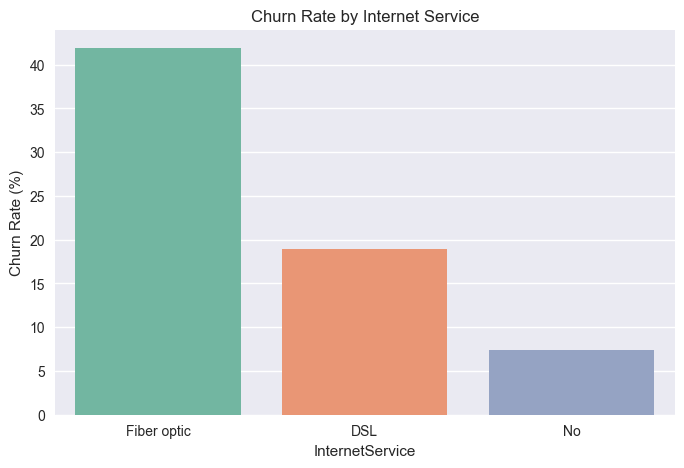

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'InternetService'),
    x='InternetService',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- Fiber optic Áî®Êà∑ churn ÁéáÊòæËëóÈ´ò‰∫é DSL ‚Üí ËØ¥ÊòéÂÖâÁ∫§Áî®Êà∑ÂèØËÉΩÂØπ‰ª∑Ê†ºÊõ¥ÊïèÊÑüÔºåÊàñËÄÖÁ´û‰∫âÊõ¥ÊøÄÁÉà„ÄÇ

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/891822802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


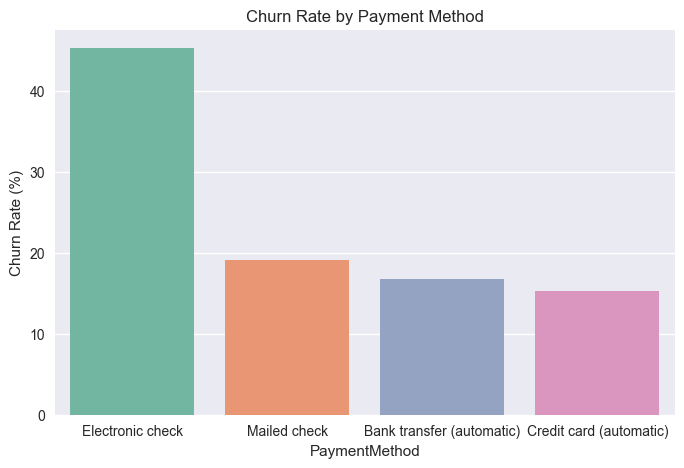

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'PaymentMethod'),
    x='PaymentMethod',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- ÊîØ‰ªò‰ΩìÈ™å‰ºöÂΩ±Âìç churnÔºåÂèØÊé®ÂπøËá™Âä®‰ªòÊ¨æÊñπÂºè
- Electronic check Áî®Êà∑ churn ÁéáÊúÄÈ´ò ‚Üí ÊöóÁ§∫ÊîØ‰ªò‰ΩìÈ™åÂ∑Æ/ÊµÅÂ§±È£éÈô©È´òÔºåÂèØ‰ª•ËÄÉËôëÂºïÂØº‰ªñ‰ª¨ÂàáÊç¢Âà∞Ëá™Âä®ËΩ¨Ë¥¶

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/4243998309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


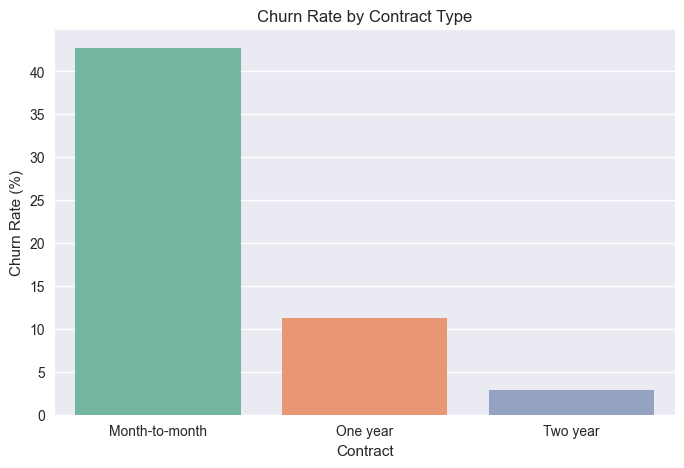

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=churn_rate_by_group(df, 'Contract'),
    x='Contract',
    y='percentage',
    palette='Set2'
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
- ÈïøÊúüÂêàÂêåËÉΩÊòæËëóÈôç‰Ωé churn
- Month-to-month Áî®Êà∑ churn ÁéáËøúÈ´ò‰∫é‰∏ÄÂπ¥/‰∏§Âπ¥ÂêàÂêå ‚Üí ‰∫ßÂìÅÂõ¢ÈòüÂèØ‰ª•ËÄÉËôëÁî®ÊäòÊâ£„ÄÅÂ•ñÂä±Êù•ÊèêÂçáÈïøÊúüÂêàÁ∫¶Ê∏óÈÄèÁéá

## 4.5 Bivariate Analysis: Churn Rate by Different Demographics
- ÂèåÂèòÈáèÂàÜÊûê: Êää‰∫∫Áæ§ÊåâÁÖßÁ±ªÂûã(‰∫∫Âè£ÁªüËÆ°Â≠¶)ÂàÜÔºåÊù•ÁúãchurnÊµÅÂ§±Áéá
- gender, SeniorCitizen, Partner, Dependents

In [43]:
def churn_rate_by_group(df, group_col):
    churn_rate = (
        df.groupby(group_col)['Churn']
        .value_counts(normalize=True)
        .rename("percentage")
        .mul(100)
        .reset_index()
    )
    churn_rate = churn_rate[churn_rate['Churn'] == "Yes"].drop(columns="Churn")
    return churn_rate.sort_values("percentage", ascending=False)

# Gender
print("Churn Rate by Gender")
display(churn_rate_by_group(df, 'gender'))

# SeniorCitizen
print("Churn Rate by SeniorCitizen")
display(churn_rate_by_group(df, 'SeniorCitizen'))

# Partner
print("Churn Rate by Partner")
display(churn_rate_by_group(df, 'Partner'))

# Dependents
print("Churn Rate by Dependents")
display(churn_rate_by_group(df, 'Dependents'))


Churn Rate by Gender


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


gender  percentage
1  Female   26.920872
3    Male   26.160338

Churn Rate by SeniorCitizen


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


SeniorCitizen  percentage
3             1   41.681261
1             0   23.606168

Churn Rate by Partner


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


Partner  percentage
1      No   32.957979
3     Yes   19.664903

Churn Rate by Dependents


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2376666401.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(group_col)['Churn']


Dependents  percentage
1         No   31.279140
3        Yes   15.450237

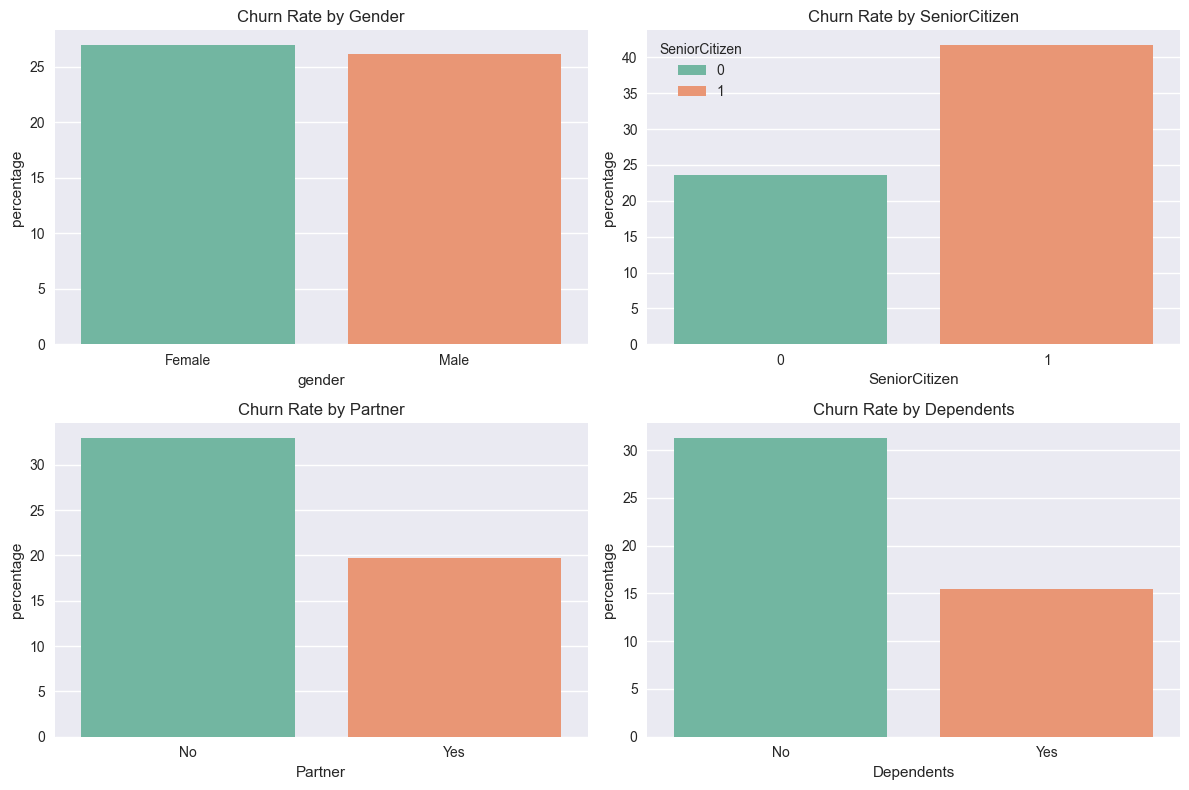

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.barplot(data=churn_rate_by_group(df, 'gender'),
            x='gender', y='percentage', hue='gender', ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Churn Rate by Gender")

sns.barplot(data=churn_rate_by_group(df, 'SeniorCitizen'),
            x='SeniorCitizen', y='percentage', hue='SeniorCitizen', ax=axes[0,1], palette="Set2")
axes[0,1].set_title("Churn Rate by SeniorCitizen")

sns.barplot(data=churn_rate_by_group(df, 'Partner'),
            x='Partner', y='percentage', hue='Partner', ax=axes[1,0], palette="Set2")
axes[1,0].set_title("Churn Rate by Partner")

sns.barplot(data=churn_rate_by_group(df, 'Dependents'),
            x='Dependents', y='percentage', hue='Dependents', ax=axes[1,1], palette="Set2")
axes[1,1].set_title("Churn Rate by Dependents")

plt.tight_layout()
plt.show()


### Business Insights:
1. Churn Rate by Gender
    - Difference bewtween male and female is not significnt, gender might not be a driving factor
    - Gender ‰∏çÊòØÂÜ≥ÂÆöÊÄßÂõ†Á¥†ÔºåÂèØËÄÉËôë‰∏¢Êéâ
2. Churn Rate by Senior Citizen
    - Senior citizen has higher churn rate
    - ÂèØËÉΩÂõ†‰∏∫‰ª∑Ê†ºÊïèÊÑüÂ∫¶È´ò„ÄÅ‰ΩøÁî®ÈúÄÊ±ÇÂ∞ëÔºåÊàñËÄÖËßâÂæóÊúçÂä°Â§çÊùÇ
    - ÂèØ‰ª•ËÄÉËôë‰∏∫ËÄÅÂπ¥Áî®Êà∑Êèê‰æõÊõ¥ÁÆÄÂåñÁöÑÊñπÊ°à/ÂÆ¢ÊúçÊîØÊåÅ
    - ËÄÅÂπ¥Áî®Êà∑ churn È´ò ‚Üí ‰∫ßÂìÅË¶ÅÂÅö‚ÄúËÄÅ‰∫∫ÂèãÂ•Ω‚Äù
3. Churn Rate by Partner
    - Those who do not have a partner have a higher churn rate
    - ÂçïË∫´Áî®Êà∑ÂèØËÉΩÊõ¥ mobile„ÄÅÊõ¥ÊÑøÊÑèÂàáÊç¢‰æõÂ∫îÂïÜ
    - ÂèØ‰ª•ÂØπËøôÁ±ªÁî®Êà∑Êé®Âá∫‰∏™ÊÄßÂåñÂ•óÈ§êÔºåÂ¢ûÂº∫ stickiness Áî®Êà∑Á≤òÂ∫¶
4. Churn Rate by Dependents
    - Those who have no dependents have a higher churn rate
    - ÂèØËÉΩÂõ†‰∏∫ÂÆ∂Â∫≠ÁªëÂÆöÊõ¥Â§öÊúçÂä°„ÄÅËøÅÁßªÊàêÊú¨È´ò
    - Use Family Plan / Bundle ÊúçÂä° Â¢ûÂä†Á≤òÊÄß
    - Êó†ÂÆ∂Â∫≠ÁªëÂÆöÁî®Êà∑ churn È´ò ‚Üí ÂèØ‰ª•ËÆæËÆ°‚ÄúÂÆ∂Â∫≠Â•óÈ§ê‚Äù

---

### Feature Engineering Insights:
1. Á°ÆËÆ§Êó†ÊïàÁâπÂæÅ
    - ÊØîÂ¶Ç Gender ‚Üí Churn Rate Â∑ÆÂºÇÊûÅÂ∞èÔºåËØ¥ÊòéËøô‰∏™ÁâπÂæÅÂØπ churn Âá†‰πéÊ≤°ÊúâÂå∫ÂàÜÂ∫¶
    - Âú® Logistic Regression ËøôÁßçÂØπÂô™Èü≥ÊïèÊÑüÁöÑÊ®°ÂûãÈáåÔºåÂèØ‰ª•ËÄÉËôë drop ÊéâÔºåÈÅøÂÖçÁ®ÄÈáäÂÖ∂‰ªñ‰ø°Âè∑
    - Âú® XGBoost ÈáåÔºåÂç≥‰Ωø‰øùÁïô GenderÔºåÂÆÉÊùÉÈáç‰πü‰ºöÂæà‰ΩéÔºå‰∏ç‰ºöÂΩ±ÂìçÊï¥‰ΩìÊ®°ÂûãÊÄßËÉΩ ‚Üí ÊâÄ‰ª•ÈùûÂøÖÈ°ª dropÔºå‰ΩÜÂèØ‰ª•ÂáèÂ∞ë feature Êï∞Èáè
2. Á°ÆËÆ§ÊúâÁî®ÁâπÂæÅ
    - SeniorCitizen„ÄÅPartner„ÄÅDependents ‚Üí churn rate Â∑ÆÂºÇÊòéÊòæÔºåËøô‰∫õÁâπÂæÅÊòØ È´ò‰ª∑ÂÄºÁöÑÂàÜÁ±ªÂèòÈáèÔºåÊ®°ÂûãËÆ≠ÁªÉÊó∂Â∫îËØ•ÈáçÁÇπ‰øùÁïô
    - ÁîöËá≥ÂèØ‰ª•ÂÅöËøõ‰∏ÄÊ≠•ÁöÑ Feature EngineeringÔºåÊØîÂ¶ÇÔºö
    - SeniorCitizen = 1 & NoPartner ‚Üí È£éÈô©ÊúÄÈ´ò ‚Üí ÂèØ‰ª•ÊûÑÈÄ†‰∫§‰∫íÁâπÂæÅ SeniorCitizen*NoPartner
3. Â∏ÆÂä©ÂÅö Encoding Á≠ñÁï•
    - ÊØîÂ¶Ç InternetService Êúâ Fiber Optic ‚Üí churn rate ÊòéÊòæÊõ¥È´òÔºåÈÇ£Âú® one-hot encoding ÂêéÔºåËøô‰∏™Á±ªÁõÆ‰ºöÁõ¥Êé•Â∏¶Âº∫‰ø°Âè∑
    - ‰ΩÜ Gender Âõ†‰∏∫Êó†Â∑ÆÂºÇÔºåÂèØ‰ª•Áõ¥Êé• binary encodeÔºåÊàñËÄÖÂπ≤ËÑÜ‰∏¢ÂºÉ

---

## 4.6 Bivariate Analysis: Churn Rate by Tenure

* Âú® **4.2 ÂçïÂèòÈáèÂàÜÊûê** ‰∏≠ÔºåÊàë‰ª¨ËßÇÂØü‰∫Ü `tenure` ÁöÑÂàÜÂ∏ÉÔºåÂèëÁé∞ÂÆ¢Êà∑ÂàÜÂ∏ÉÂú® **Áü≠ÊúüÔºà0‚Äì12 ÊúàÔºâ** Âíå **ÈïøÊúüÔºàÊé•Ëøë 72 ÊúàÔºâ** ‰∏§Á´ØÊØîËæÉÈõÜ‰∏≠„ÄÇ
* ‰ªÖ‰ªéÂàÜÂ∏ÉÂõæÊó†Ê≥ïÂà§Êñ≠Âì™‰∫õÂå∫Èó¥ÁöÑÂÆ¢Êà∑ churn È£éÈô©Êõ¥È´òÔºåÂõ†Ê≠§Êàë‰ª¨ÈúÄË¶ÅËøõ‰∏ÄÊ≠•È™åËØÅ„ÄÇ
* ‰∏∫‰∫ÜÊõ¥Ê∏ÖÊô∞Âú∞Êè≠Á§∫ `tenure` ‰∏é `churn` ÁöÑÂÖ≥Á≥ªÔºåÊàë‰ª¨Â∞ÜÊï∞ÂÄºÂûãÁöÑ `tenure` **ÂàÜÁÆ±ÔºàbinningÔºâ** ËΩ¨Êç¢‰∏∫Á±ªÂà´ÂûãÂèòÈáèÔºåÂπ∂ËÆ°ÁÆóÊØè‰∏™Âå∫Èó¥ÁöÑ **churn rate**„ÄÇ
* ËøôÁßçÊñπÊ≥ïÂ±û‰∫é **Êï∞ÂÄºÂèòÈáèÁ¶ªÊï£ÂåñÂêéÁöÑÂèåÂèòÈáèÂàÜÊûê**ÔºåÂèØ‰ª•Â∏ÆÂä©Êàë‰ª¨Á°ÆÂÆö **Êñ∞/‰∏≠/ËÄÅÂÆ¢Êà∑ÁöÑÂêàÁêÜÂàíÂàÜÊñπÂºè**ÔºåÂπ∂‰∏∫ÂêéÁª≠ÁöÑÁâπÂæÅÂ∑•Á®ãÔºàÂ¶Ç `is_new_customer`ÔºâÊèê‰æõÊï∞ÊçÆ‰æùÊçÆ„ÄÇ

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/3917443794.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn_bol'].mean().reset_index()


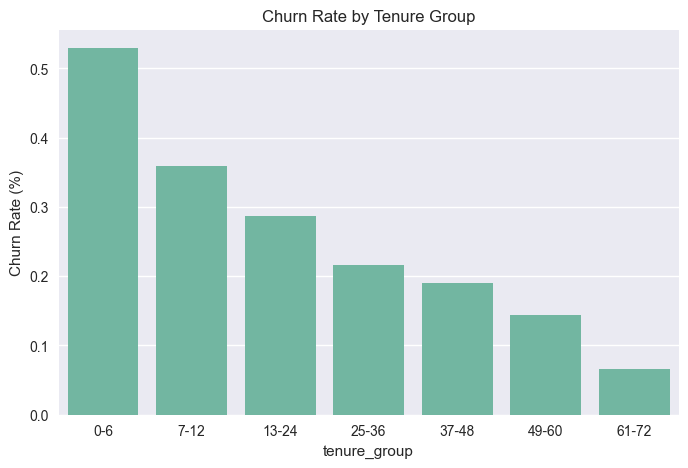

In [32]:
# tenure ÂàÜÁÆ±
bins = [0, 6, 12, 24, 36, 48, 60, 72]
labels = ["0-6", "7-12", "13-24", "25-36", "37-48", "49-60", "61-72"]
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# churn ËΩ¨Êç¢‰∏∫ 0/1
df['Churn_bol'] = (df['Churn'] == 'Yes').astype(int)

# ÊØè‰∏™ÂàÜÁªÑÁöÑ churn Áéá
churn_by_tenure = df.groupby('tenure_group')['Churn_bol'].mean().reset_index()

# ÂèØËßÜÂåñ
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_tenure, x='tenure_group', y='Churn_bol')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()


### Insights:
* ÊúÄÁªàÊûÑÈÄ†‰∏§‰∏™Êñ∞ÁöÑ features:
    * is_new_customer = tenure <= 6 
        * 0‚Äì6 Êúà churn rate È´òËææ ~50%+ÔºåËøúÈ´ò‰∫éÂÖ∂‰ªñÂå∫Èó¥, Êñ∞ÂÆ¢Êà∑ churn È£éÈô©ÊûÅÈ´ò
    * tenure_bin = {Êñ∞ (0‚Äì6), ‰∏≠ (7‚Äì24), ËÄÅ (25+)}
        * 0‚Äì6 churn ÊúÄÈ´ò ‚Üí Áã¨Á´ã‰∏ÄÁ±ª
        * 7‚Äì24 churn ‰ªçÂÅèÈ´òÔºå‰ΩÜÊØî 0‚Äì6 Á®≥ÂÆö ‚Üí ‰∏≠ÊúüÁæ§‰Ωì
        * 25+ churn ÈÄêÊ∏ê‰∏ãÈôçÂπ∂Ë∂ãÁ®≥ ‚Üí ÈïøÊúüÂø†ËØöÂÆ¢Êà∑

In [33]:
# print min and max of tenure
print("Min Tenure:", df['tenure'].min())
print("Max Tenure:", df['tenure'].max())

Min Tenure: 0
Max Tenure: 72


## 4.7 Bivariate Analysis: MonthlyCharges & TotalCharges vs Churn
* Â∏ÆÂä©Êàë‰ª¨ÂéªÊûÑÈÄ† MonthlyCharges ÁöÑÂàÜ‰∫´
* Â∏ÆÂä©Êàë‰ª¨Êü•Áúã TotalCharges Âíå Churn ÁöÑÂÖ≥Á≥ª

/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/2859373187.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_monthly = df.groupby('monthly_bin')['Churn_bol'].mean().reset_index()


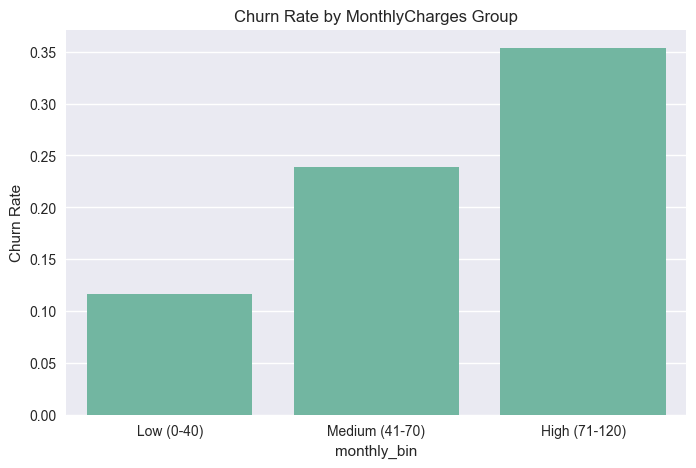

In [34]:
# ===============================
# 1. MonthlyCharges vs Churn
# ===============================
# ÂàÜÁÆ±
bins_mc = [0, 40, 70, 120]
labels_mc = ["Low (0-40)", "Medium (41-70)", "High (71-120)"]
df['monthly_bin'] = pd.cut(df['MonthlyCharges'], bins=bins_mc, labels=labels_mc, include_lowest=True)

# ÊØè‰∏™ÂàÜÁªÑÁöÑ churn Áéá
churn_by_monthly = df.groupby('monthly_bin')['Churn_bol'].mean().reset_index()

# ÂèØËßÜÂåñ
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_monthly, x='monthly_bin', y='Churn_bol')
plt.title("Churn Rate by MonthlyCharges Group")
plt.ylabel("Churn Rate")
plt.show()

### Insights:
* ÊûÑÈÄ†Êñ∞ÁöÑfeature: 
  * **monthly\_bin = {Low (0‚Äì40), Medium (41‚Äì70), High (71‚Äì120)}**
    * LowÔºöchurn ÁéáÊúÄ‰Ωé (\~11%) ‚Üí ÂÆ¢Êà∑Á®≥ÂÆö„ÄÇ
    * MediumÔºöchurn Áéá‰∏≠Á≠â (\~24%) ‚Üí Êé•ËøëÊï¥‰ΩìÂπ≥Âùá„ÄÇ
    * HighÔºöchurn ÁéáÊúÄÈ´ò (\~35%+) ‚Üí È´òË¥πÁéáÂÆ¢Êà∑È£éÈô©ÊòæËëóÂ¢ûÂä†„ÄÇ

In [35]:
# print min and max of monthly charges
print("Min MonthlyCharges:", df['MonthlyCharges'].min())
print("Max MonthlyCharges:", df['MonthlyCharges'].max())

Min MonthlyCharges: 18.25
Max MonthlyCharges: 118.75


/var/folders/z0/04z2rqb15clghzyyrhjps86r0000gn/T/ipykernel_12080/3713098183.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_total = df.groupby('total_bin')['Churn_bol'].mean().reset_index()


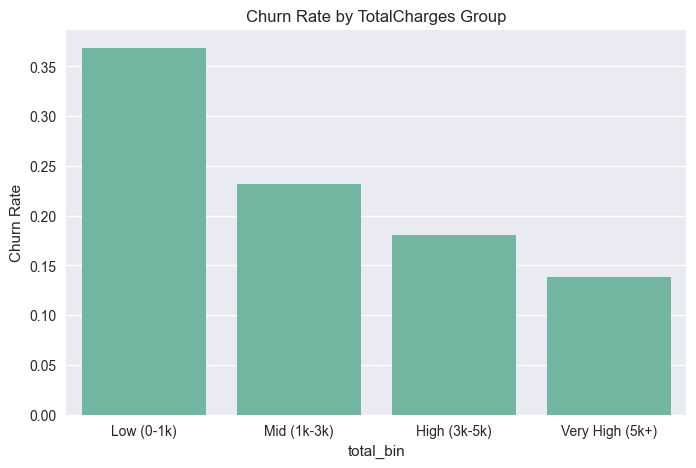

In [36]:
# ===============================
# 2. TotalCharges vs Churn
# ===============================
# ÂàÜÁÆ±
bins_tc = [0, 1000, 3000, 5000, 9000]
labels_tc = ["Low (0-1k)", "Mid (1k-3k)", "High (3k-5k)", "Very High (5k+)"]
df['total_bin'] = pd.cut(df['TotalCharges'], bins=bins_tc, labels=labels_tc, include_lowest=True)

# ÊØè‰∏™ÂàÜÁªÑÁöÑ churn Áéá
churn_by_total = df.groupby('total_bin')['Churn_bol'].mean().reset_index()

# ÂèØËßÜÂåñ
plt.figure(figsize=(8,5))
sns.barplot(data=churn_by_total, x='total_bin', y='Churn_bol')
plt.title("Churn Rate by TotalCharges Group")
plt.ylabel("Churn Rate")
plt.show()

### Insights:

* **TotalCharges ‰∏é churn ÂëàÈó¥Êé•ÂÖ≥Á≥ª**Ôºà‰∏ªË¶ÅÈÄöËøá tenure ÁöÑÈïøÁü≠‰ΩìÁé∞Ôºâ„ÄÇ
* Churn rate ÈöèÁ¥ØËÆ°Ë¥¶ÂçïÂ¢ûÂä†ËÄåÈÄêÊ≠•‰∏ãÈôçÔºö

  * **Low (0‚Äì1k)Ôºö** churn ÁéáÊúÄÈ´ò (\~37%) ‚Üí Â§ö‰∏∫Êñ∞ÂÆ¢Êà∑ÔºåÊµÅÂ§±È£éÈô©Â§ß„ÄÇ
  * **Mid (1k‚Äì3k)Ôºö** churn Áéá‰∏ãÈôç (\~23%)„ÄÇ
  * **High (3k‚Äì5k)Ôºö** churn ÁéáÁªßÁª≠‰∏ãÈôç (\~18%)„ÄÇ
  * **Very High (5k+)Ôºö** churn ÊúÄ‰Ωé (\~14%) ‚Üí Â§ö‰∏∫ËÄÅÂÆ¢Êà∑ÔºåÈïøÊúüÁ®≥ÂÆö„ÄÇ
* **Feature Engineering ÂêØÁ§∫**Ôºö

  * `TotalCharges` ‰ø°ÊÅØÈ´òÂ∫¶ÈáçÂè†‰∫é `tenure` ‚Üí Â≠òÂú®Â§öÈáçÂÖ±Á∫øÊÄß„ÄÇ
  * Âª∫Ê®°Êó∂Âª∫ËÆÆÔºö

    * **‰∏¢ÂºÉ `TotalCharges`**ÔºàÈÅøÂÖçÂÜó‰ΩôÔºâ„ÄÇ
    * ÊàñÊõø‰ª£‰∏∫ `AvgCharges = TotalCharges / tenure`ÔºàÊõ¥Áõ¥ËßÇÂèçÊò†ÂÆ¢Êà∑Âπ≥Âùá‰ª∑ÂÄºÔºâ„ÄÇ

In [37]:
# print min and max of total charges
print("Min TotalCharges:", df['TotalCharges'].min())
print("Max TotalCharges:", df['TotalCharges'].max())

Min TotalCharges: 0.0
Max TotalCharges: 8684.8


## 4.7 Correlation Heatmap
- Áõ∏ÂÖ≥ÊÄßÁÉ≠ÂäõÂõæ

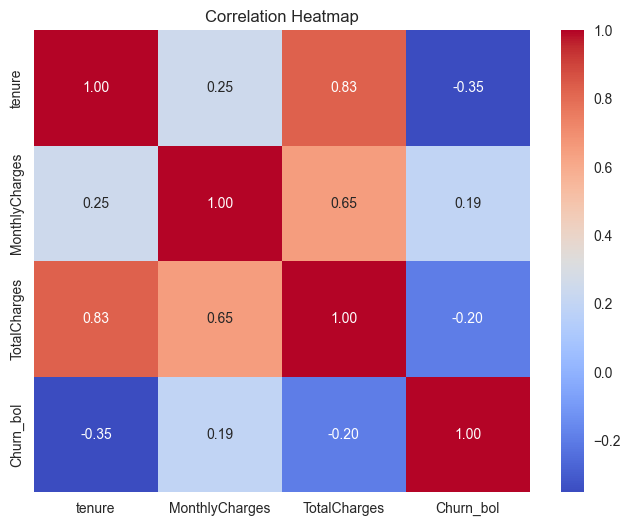

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['tenure','MonthlyCharges','TotalCharges','Churn_bol']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Insights

* `tenure` ‰∏é `TotalCharges` È´òÂ∫¶Áõ∏ÂÖ≥Ôºà0.83ÔºâÔºåÊèêÁ§∫Â≠òÂú®Â§öÈáçÂÖ±Á∫øÊÄßÔºåËøô‰πüÊòØÂêéÁª≠ÊûÑÈÄ† `AvgCharges` ÁöÑÂä®Êú∫„ÄÇ
* `tenure` ‰∏é `Churn` ÊòæËëóË¥üÁõ∏ÂÖ≥Ôºà-0.35ÔºâÔºåËØ¥ÊòéÂÆ¢Êà∑Âú®ÁΩëÊó∂Èó¥Ë∂ä‰πÖË∂äÁ®≥ÂÆö„ÄÇ
* `MonthlyCharges` ‰∏é `Churn` Âº±Ê≠£Áõ∏ÂÖ≥Ôºà0.19ÔºâÔºåË°®ÊòéÈ´ò‰ª∑‰ΩçÂÆ¢Êà∑ÁöÑ churn È£éÈô©Êõ¥È´ò„ÄÇ
* `TotalCharges` ‰∏é `Churn` Âº±Ë¥üÁõ∏ÂÖ≥Ôºà-0.20ÔºâÔºå‰ΩÜ‰∏ªË¶ÅÊòØÁî±‰∫éÂÖ∂‰∏é `tenure` ÁöÑÈ´òÂ∫¶Áõ∏ÂÖ≥ÊÄß„ÄÇ

---

### Feature Engineering / Ê®°ÂûãÁöÑÂêØÂèë

* **Logistic Regression**ÔºöÂèØËÉΩÈúÄË¶ÅÂéªÊéâ `TotalCharges` ÊàñÁî® `AvgCharges` Êõø‰ª£ÔºåÈÅøÂÖçÂ§öÈáçÂÖ±Á∫øÊÄß„ÄÇ
* **Ê†ëÊ®°Âûã (XGB/LGBM)**ÔºöÂèØ‰ª•‰øùÁïôÂÖ®ÈÉ®ÁâπÂæÅÔºå‰ΩÜ `AvgCharges` ‰ªçÁÑ∂ÊúâÂä©‰∫é‰∏öÂä°ÂèØËß£ÈáäÊÄß„ÄÇ

---

# 5. Conclusion & Insights

## Feature Engineering Notes

Âü∫‰∫éÂâçÈù¢ÂØπ **Telco Customer Churn** Êï∞ÊçÆÁöÑÊé¢Á¥¢ÊÄßÂàÜÊûêÔºàEDAÔºâÔºåÊàë‰ª¨ÂæóÂà∞‰ª•‰∏ãÊ¥ûËßÅÔºåÂπ∂ÊçÆÊ≠§ÊèêÂá∫Áõ∏Â∫îÁöÑÁâπÂæÅÂ∑•Á®ãËÆæËÆ°„ÄÇ

---

### 1. TenureÔºàÂÆ¢Êà∑Âú®ÁΩëÊó∂ÈïøÔºâ

* **Insight**Ôºö

  * Áü≠ÊúüÂÆ¢Êà∑ÔºàÂ∞§ÂÖ∂ÊòØ 0‚Äì6 ÊúàÔºâ churn ÁéáÊûÅÈ´òÔºà>50%Ôºâ„ÄÇ
  * ‰∏≠ÊúüÂÆ¢Êà∑Ôºà7‚Äì24 ÊúàÔºâ churn Áéá‰ªçÁÑ∂ÂÅèÈ´òÔºå‰ΩÜÂ∑≤ÊòéÊòæ‰∏ãÈôç„ÄÇ
  * ÈïøÊúüÂÆ¢Êà∑Ôºà25+ ÊúàÔºâ churn ÁéáËæÉ‰ΩéÔºåÂÆ¢Êà∑Áõ∏ÂØπÁ®≥ÂÆö„ÄÇ
* **Feature Engineering**Ôºö

  * `is_new_customer = tenure <= 6` ‚Üí Ê†áËÆ∞È´òÈ£éÈô©Êñ∞Áî®Êà∑„ÄÇ
  * `tenure_bin = {Êñ∞ (0‚Äì6), ‰∏≠ (7‚Äì24), ËÄÅ (25+)}` ‚Üí ÊçïÊçâÁîüÂëΩÂë®ÊúüÊïàÂ∫î„ÄÇ
* **È¢ùÂ§ñË°•ÂÖÖ**:
  * ÂÖàÁîªÂá∫ ÂàÜÁÆ±ÂêéÁöÑ churn rate bar chartÔºàÂ∞±ÂÉè tenure ÈÇ£Âº†Ôºâ„ÄÇ
  * ÂÜçÂà§Êñ≠ Âì™‰∫õÂå∫Èó¥ churn rate ÊòéÊòæÈ´ò/‰ΩéÔºåÊçÆÊ≠§ÂàÜÂ±Ç„ÄÇ
  * Ëá≥‰∫é ‚ÄúÂ§öÂ∞ëÁÆóÈ´ò/‰∏≠/‰Ωé‚ÄùÔºåÁé∞ÂÆû‰∏≠ÈúÄË¶ÅÁªìÂêà‰∏öÂä°ÔºåÊØîÂ¶ÇÔºö
    * Áîµ‰ø°ÂÖ¨Âè∏ËßâÂæó ÊµÅÂ§±Áéá >40% = ‰∏•ÈáçÈóÆÈ¢ò
    * 20‚Äì40% = ÈúÄË¶ÅÂÖ≥Ê≥®
    * <20% = Á®≥ÂÆö

---

### 2. MonthlyChargesÔºàÊúàË¥¶ÂçïÔºâ

* **Insight**:
  * Low (0‚Äì40)Ôºöchurn ÊúÄ‰Ωé (~11%)  
  * Medium (41‚Äì70)Ôºöchurn ‰∏≠Á≠â (~24%)  
  * High (71‚Äì120)Ôºöchurn ÊúÄÈ´ò (~35%+)  
* **Feature Engineering**:
  * `monthly_bin = {Low, Medium, High}`  
  * Logistic Regression ‚Üí Êï∞ÂÄºÂèòÈáèÂèØÂÅö StandardScaler  
  * Ê†ëÊ®°Âûã ‚Üí ÂéüÂßãËøûÁª≠ÂÄºË∂≥Â§üÔºåÂàÜÁÆ±Â¢ûÂº∫Ëß£ÈáäÊÄß

---

### 3. TotalChargesÔºàÁ¥ØËÆ°Ë¥¶ÂçïÔºâ

* **Insight**Ôºö

  * ‰∏é `tenure` È´òÂ∫¶Ê≠£Áõ∏ÂÖ≥Ôºà0.83ÔºâÔºåÂèØËÉΩÂØºËá¥Â§öÈáçÂÖ±Á∫øÊÄß„ÄÇ
  * ‰∏é churn ÂëàÂº±Ë¥üÁõ∏ÂÖ≥Ôºà-0.20ÔºâÔºå‰∏ªË¶ÅÊòØ tenure ÁöÑ‚ÄúÂΩ±Â≠êÊïàÂ∫î‚Äù„ÄÇ
  * Êï∞Â≠¶‰∏äÔºöTotalCharges ‚âà MonthlyCharges √ó tenure
  * ÊâÄ‰ª• TotalCharges È´òÔºåÂÖ∂ÂÆûÂ∏∏Â∏∏ÊÑèÂë≥ÁùÄ ‚ÄúÁî®Êà∑ÂæÖÂæó‰πÖ‚Äù„ÄÇ
  * tenure Âíå churn Â∑≤ÁªèÊòØÂº∫Ë¥üÁõ∏ÂÖ≥Ôºà-0.35ÔºâÔºåÂõ†Ê≠§ TotalCharges Âíå churn ÁöÑÂº±Ë¥üÁõ∏ÂÖ≥Ôºà-0.20ÔºâÂÖ∂ÂÆûÂè™ÊòØ Âõ†‰∏∫ tenure ÁöÑÂ≠òÂú®ÔºåÂÆÉ‚ÄúÂΩ±Â∞Ñ‚Äù‰∫Ü tenure ÁöÑ‰ø°ÊÅØÔºåËÄå‰∏çÊòØ TotalCharges Êú¨Ë∫´ÁöÑÁã¨Á´ãË¥°ÁåÆ„ÄÇ
  * Êç¢Âè•ËØùËØ¥Ôºöüëâ TotalCharges ‰∏é churn ÁöÑË¥üÁõ∏ÂÖ≥Ôºå‰∏çÊòØÂõ†‰∏∫‚ÄúË¥¶ÂçïÈ´òÁöÑ‰∫∫Â∞±‰∏çÊµÅÂ§±‚ÄùÔºåËÄåÊòØÂõ†‰∏∫‚ÄúË¥¶ÂçïÈ´òÁöÑ‰∫∫Â§ßÊ¶ÇÁéáÊòØËÄÅÂÆ¢Êà∑ ‚Üí ËÄÅÂÆ¢Êà∑‰∏çÊµÅÂ§±‚Äù„ÄÇ

* **Feature Engineering**Ôºö

  * ÂèØÁõ¥Êé•ËàçÂºÉÔºåÈÅøÂÖç‰∏é `tenure` Âº∫Áõ∏ÂÖ≥„ÄÇ
  * ÊàñÊûÑÈÄ†Êñ∞ÁâπÂæÅÔºö

    * `AvgCharges = TotalCharges / tenure`Ôºàtenure>0 Êó∂ÔºõÂê¶ÂàôÂèØËÆæ‰∏∫ 0 Êàñ MonthlyChargesÔºâ„ÄÇ
    * Êõ¥Â•ΩÂú∞ÂèçÊò†ÂÆ¢Êà∑Âπ≥ÂùáÊúàÊ∂àË¥πÊ∞¥Âπ≥„ÄÇ
  * ÈÄÇÁî®ÊÄßÔºö

    * **Logistic Regression**ÔºöÊé®Ëçê‰ΩøÁî® `AvgCharges` Êõø‰ª£ TotalCharges„ÄÇ
    * **Ê†ëÊ®°Âûã**ÔºöÂèØ‰ª•‰øùÁïôÂÖ®ÈÉ®Ôºå‰ΩÜ `AvgCharges` ËÉΩÊèêÂçá‰∏öÂä°ÂèØËß£ÈáäÊÄß„ÄÇ

---

### 4. DemographicsÔºàÂÆ¢Êà∑Â±ûÊÄßÔºâ

* **Insight**Ôºö

  * Gender ÂØπ churn Âá†‰πéÊ≤°ÊúâÂΩ±Âìç ‚Üí ÂèØËÉΩÂèØËàçÂºÉ„ÄÇ
  * SeniorCitizen„ÄÅPartner„ÄÅDependents Á≠âÂØπ churn ÊúâÊòéÊòæÂ∑ÆÂºÇ„ÄÇ
* **Feature Engineering**Ôºö

  * ‰øùÁïôÊúâ‰∏öÂä°ÊÑè‰πâÁöÑÁ±ªÂà´ÁâπÂæÅÔºàÂ¶Ç SeniorCitizen, Partner, DependentsÔºâ„ÄÇ
  * Gender ÂèØÂú® Logistic Regression ‰∏≠Â∞ùËØïÂâîÈô§ÔºåÂáèÂ∞ëÂô™Èü≥„ÄÇ

---

### 5. Services / Contract FeaturesÔºàÊúçÂä°/ÂêàÁ∫¶Ôºâ

* **Insight**Ôºö

  * InternetService„ÄÅContract„ÄÅPaymentMethod Á≠â‰∏é churn Â∑ÆÂºÇÊòæËëó„ÄÇ
  * PaperlessBilling Áï•ÊúâÂΩ±ÂìçÔºå‰ΩÜÁõ∏ÂØπËæÉÂ∞è„ÄÇ
* **Feature Engineering**Ôºö

  * ‰øùÁïôÊ†∏ÂøÉÁâπÂæÅÔºöContract, InternetService, PaymentMethod„ÄÇ
  * Á±ªÂà´ÂèòÈáèÁªü‰∏ÄÂÅö **One-Hot Encoding**ÔºàÁî®‰∫é LR/Ê†ëÊ®°ÂûãÔºâ„ÄÇ

---

### 6. ChurnÔºàÁõÆÊ†áÂèòÈáèÔºâ

* **Insight**Ôºö

  * churn ÁéáÁ∫¶ \~26%ÔºåÂ≠òÂú®‰∏ÄÂÆöÁ±ªÂà´‰∏çÂπ≥Ë°°Ôºå‰ΩÜ‰∏çÁÆóÊûÅÁ´Ø„ÄÇ
* **Model Implication**Ôºö

  * Logistic RegressionÔºöÂèØËÄÉËôë class\_weight = "balanced"„ÄÇ
  * Ê†ëÊ®°ÂûãÔºàXGB/LGBMÔºâÔºöÂèØÁõ¥Êé•Â§ÑÁêÜÔºåÂøÖË¶ÅÊó∂ÂèØÂÅöËΩªÂ∫¶ resampling„ÄÇ

---

## üîπ ‰∏ã‰∏ÄÊ≠•ÔºàEDA ‚Üí Âª∫Ê®°Ôºâ

1. ÂØºÂá∫ÁöÑÁõÆÊ†áÔºö‰∏Ä‰ªΩ‚ÄúÂπ≤ÂáÄ‰ΩÜÊú™ÁâπÂæÅÂåñ‚ÄùÁöÑÊï∞ÊçÆÈõÜ
    * Â∑≤ÂÅöÔºöÁ°ÆÂÆöÊÄßÊ∏ÖÊ¥óÔºàÂéªÁ©∫Ê†º„ÄÅÁ±ªÂûãËΩ¨Êç¢„ÄÅËßÑÂàôÊÄß‰øÆÊ≠£Â¶Ç tenure=0 ‚Üí TotalCharges=0Ôºâ
    * Êú™ÂÅöÔºö‰ªª‰Ωï‰ºö‚ÄúÂ≠¶‰π†ÁªüËÆ°Èáè/ËæπÁïå‚ÄùÁöÑÊìç‰ΩúÔºàÂàÜÁÆ±„ÄÅÊ†áÂáÜÂåñ„ÄÅEncoder„ÄÅÂπ≥ÂùáÂÄº/‰∏≠‰ΩçÊï∞Â°´Ë°•„ÄÅÁõÆÊ†áÁºñÁ†ÅÁ≠âÔºâ‚Äî‚Äî Ëøô‰∫õÁïôÂà∞ model.ipynb ÁöÑ Pipeline ÈáåÔºåÈÅøÂÖçÊï∞ÊçÆÊ≥ÑÊºè

2. Âú® **model.ipynb** ‰∏≠Ôºö

   * ÂàíÂàÜ Train/Test ÈõÜÔºàstratified split ‰øùÊåÅ churn ÊØî‰æãÔºâ„ÄÇ
   * ÁâπÂæÅÁºñÁ†ÅÔºàOne-hot / Label EncodingÔºâ„ÄÇ
   * Ê†áÂáÜÂåñÔºà‰ªÖÂØπÊï∞ÂÄºÁâπÂæÅÁî®‰∫é LRÔºâ„ÄÇ
   * Âª∫Á´ã baseline Ê®°ÂûãÔºàLogistic Regression, XGBoostÔºâ„ÄÇ
   * ÂêéÁª≠ËøõË°åÊ®°ÂûãÂØπÊØî‰∏éË∞É‰ºò„ÄÇ

---

In [39]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  PaperlessBilling              PaymentMethod MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.85        29.85   
1               No               Mailed check          56.95      1889.50   
2              Yes               Mailed check          53.85       108.15   
3               No  Bank transfer (automatic)          42.30      1840.75   
4              Yes           Electronic check          70.70       151.65   

  Churn TotalCharges_check tenure_group  Churn_bol     monthly_bin  \
0    No              29.85          0-6          0      Low (0-40)   
1    No            1936.30        25-36          0  Medium (41-70)   
2   Yes             107.70          0-6          1  Medium (41-70)   
3    No            1903.50        37-48          0  Medium (41-70)   
4   Yes             141.40          0-6          1   High (71-120)   

     total_bin  
0   Low (0-1k)  
1  Mid (1k-3k)  
2   Low (0-1k)  
3  Mid (1k-3k)  
4   Low (0-1k)  

[5 rows x 25 columns]

In [ ]:
# Export the cleaned DataFrame to CSV and Parquet formats for modeling and analysis

import pandas as pd
import numpy as np

# 1) ËØªÂèñÂéüÂßã CSV
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# 2) Âü∫Á°ÄÊ∏ÖÊ¥óÔºàÂè™ÂÅöÁ°ÆÂÆöÊÄßÊìç‰ΩúÔºâ
# ÂéªÁ©∫Ê†º ‚Üí NaNÔºõÂÖ≥ÈîÆÂàóÁ±ªÂûãËΩ¨Êç¢
df = df.replace(" ", np.nan)

# ËΩ¨Êï∞ÂÄº
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# tenure=0 ‚Üí TotalCharges=0Ôºà‰∏öÂä°ËßÑÂàôÔºâ
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

# ÂéªÈáçÔºà‰ª• customerID ‰∏∫‰∏ªÈîÆÔºâ
df = df.drop_duplicates(subset=['customerID'])

# ÊòéÁ°ÆÂ∏ÉÂ∞î/Á±ªÂà´ÂàóÁöÑ dtypeÔºà‰∏çÂÅöÁºñÁ†ÅÔºå‰ªÖÂ£∞ÊòéÔºâ
# ‰ΩúÁî®ÔºöÊääÂéüÊú¨ "Yes"/"No" ÁöÑÊñáÊú¨ÂàóËΩ¨Êç¢Êàê Â∏ÉÂ∞îÂÄº True/False
# ‰∏çÈúÄË¶ÅÂÜçÊµ™Ë¥π One-Hot ‰∏§‰∏™ dummy ÂàóÔºåÁõ¥Êé• True/False Â∞±Â§ü
bool_like = ['PaperlessBilling']
for c in bool_like:
    if c in df.columns:
        df[c] = df[c].map({'Yes': True, 'No': False})

cat_cols = [
    'gender','SeniorCitizen','Partner','Dependents',
    'PhoneService','MultipleLines','InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod'
]
# ÊääËøô‰∫õÂàóÊòæÂºèÂ£∞Êòé‰∏∫ pandas ÁöÑ category dtype
# ÂêéÁª≠Âú® OneHotEncoder ÈáåÔºåÁºñÁ†ÅÂô®‰ºöÁü•ÈÅìÂÆåÊï¥ÁöÑÁ±ªÂà´ÈõÜÂêà
# ‰∏∫ÂêéÁª≠ÁöÑ One-Hot Encoding ÂÅöÂáÜÂ§á
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

# 3) ‰øùÁïô customerIDÔºà‰æõÁ∫ø‰∏ä/È¢ÑÊµãÂØπÈΩêÔºâÔºå‰ΩÜÂª∫Ê®°Êó∂ÊéíÈô§
# # 4) ÁÆÄË¶ÅÊï∞ÊçÆ‰∏ÄËá¥ÊÄßÊ£ÄÊü•ÔºàÂèØÈÄâÔºâ
# assert df['tenure'].ge(0).all(), "tenure ÊúâÈùûÊ≥ïÂÄº"
# assert df['MonthlyCharges'].ge(0).all(), "MonthlyCharges ÊúâÈùûÊ≥ïÂÄº"
# assert df['TotalCharges'].ge(0).fillna(True).all(), "TotalCharges ÊúâÈùûÊ≥ïÂÄº"

# 5) ÂêåÊó∂ÂØºÂá∫ Parquet + CSVÔºàÊú™ÁâπÂæÅÂåñÔºâ
# Êõ¥Âø´ I/O„ÄÅÂ§©ÁÑ∂ÂéãÁº©ÔºàsnappyÔºâ„ÄÅ‰øùÂ≠òÁ≤æÁ°Æ dtypeÔºàÂ∞§ÂÖ∂ÊòØÂàÜÁ±ª/ÊµÆÁÇπÔºâ
# ‰∏öÁïåÂ∏∏Áî®ÂàóÂºèÂ≠òÂÇ®Ê†ºÂºè
df.to_parquet("data/clean_telco.parquet", index=False)
df.to_csv("data/clean_telco.csv", index=False)

print("Saved: data/clean_telco.parquet & data/clean_telco.csv")


Saved: data/clean_telco.parquet & data/clean_telco.csv


In [41]:
# pip install -U "pandas" "pyarrow"